

# Intégrales multiples

<div class='alert alert-info'>
    <p>

- La première partie de ce TP consistera à résoudre numériquement une intégrale simple en se réappropriant la méthode de Riemann utilisée lors du TP sur les intégrales simples du premier semestre.
- La deuxième partie consistera à s'insipirer de cette tecnique pour intégrer numériquement des intégrales multiples. </p>
</div>

## 1. Intégrale simple : masse d’une barre inhomogène
Soit une tige métallique de longueur $\ell$ et dont les dimensions de sa section sont supposées négligeables
devant sa longueur. La masse linéique $\lambda$ de la tige varie en fonction de la distance $x$ par rapport à son extrémité selon la loi $\lambda(x) = \lambda_0+kx^2$, où $\lambda_0$ et $k$ sont des constantes positives.

- Q1. Déterminer analytiquement la valeur exacte de la masse $m=\displaystyle\int_0^\ell \lambda(x) \mathrm{d}x$  de cette tige.
> $m=\lambda_0 \ell + k\frac{\ell^3}{3}$

- Q2. Application numérique : calculer $m$ pour $\ell = 1,2$ m, $\lambda_0 = 0,625$ kg . m⁻¹, $k = 5,0\times 10^{-2}$ kg. m⁻³.


In [4]:
1.2*0.625+5E-2*(1.2**3)/3

0.7788

- Q3. En complétant le code python ci-dessous et à l'aide de la méthode de Riemann, calculer numériquement la valeur de $m$ pour des pas d'intégration allant du décimètre au micromètre. Conclusion ?


In [15]:
l = 1.2
a = 0
b = l
lambda_0 = 0.625
k = 5E-2
def riemann_int(dx):
    N = len(dx)     # Nombre de pas d'intégration testés
    m = [0] * N     # Initialisation du résultat de l’intégrale pour chaque pas de temps testé
    
    for q in range(N):                 
        f = 0
        x = a
        while x < b:
            x     = a+f*dx[q]                     # Point d'évaluation pour la subdivision
            m[q] += (lambda_0 + k *x**2) * dx[q]          # Somme successive des aires de chaque subdivision
            f     = f + 1
    return m


dx=[1e-1,5e-2,1e-2,5e-3,1e-3,5e-4,1e-4,5e-5,1e-5,5e-6,1e-6]
m=riemann_int(dx)
print(m)

[0.845, 0.811875, 0.7854110000000004, 0.7821052499999999, 0.7794610099999996, 0.7791305025000002, 0.778866100100001, 0.778833050025, 0.7788066100009953, 0.7788033050002414, 0.778800660999983]


- Q4. Calculer pour chaque valeur de pas d'intégration l'écart relatif en pourcent entre la valeur approchée et la valeur exacte. 

In [17]:
print([abs(m-1.2*0.625-5E-2*(1.2**3)/3)*100 for m in m])

[6.619999999999998, 3.307500000000002, 0.6611000000000419, 0.33052499999998675, 0.06610099999995699, 0.03305025000001592, 0.0066100100001017376, 0.003305002500003304, 0.0006610000995273951, 0.00033050002414235224, 6.609999830230195e-05]


- Q5. Tracer l'évolution de $m$ en fonction du pas d'intégration. Utiliser une échelle logarithmique pour l'axe des abscisses.

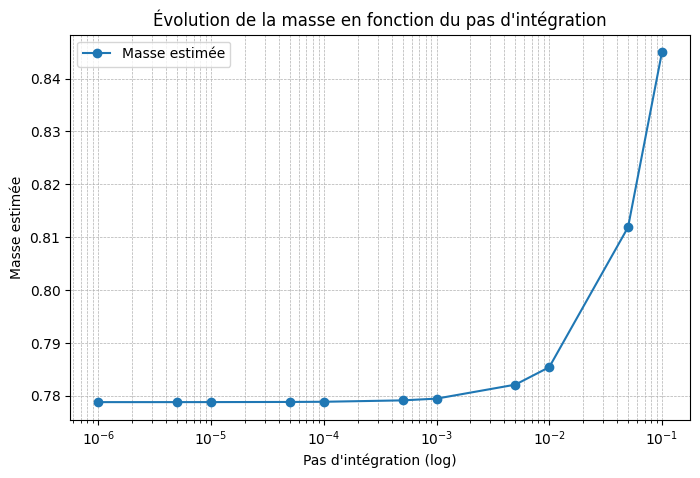

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 5))
plt.plot(dx, m, marker='o', label='Masse estimée')
plt.xscale('log')
plt.xlabel('Pas d\'intégration (log)')
plt.ylabel('Masse estimée')
plt.title('Évolution de la masse en fonction du pas d\'intégration')
plt.grid(True, which="both", linestyle='--', linewidth=0.5)
plt.legend()
plt.show()


## 2. Extension au cas des intégrales multiples

On propose de calculer l'aire $A$ du domaine $D$ défini par :

$$D = \{(x, y) \in \mathbb R^2 ∣ x^2 + y^2 \leq 4, x \geq  0, y \geq 0 \}$$

- Q1. Représenter ce domaine (sur papier). Quel est le résultat attendu ?

> Le domaine $D$ est le quart de disque de rayon 2 centré à l'origine. L'aire du disque est $\pi R^2 = 4\pi$ donc l'aire du quart de disque est $\pi$.

- Q2. En s'inspirant du codeprécédent, calculer l'air $A$ en complétant le code ci-dessous. Pour cela, il faut écrire deux boucles imbriquées en faisant attention à l'initialisation des variables. Utilisez les coordonnées polaires

In [23]:
import math
def Calcul_Aire_D_double(dr,dtheta):  
    A = 0  # initialisation du résultat de l’intégrale
    r = 0  # initialisation de la variable radiale  
    
    while r < 2:
        theta = 0  # initialisation de la variable angle polaire
        while theta < math.pi/2:
            A     += r*dr*dtheta  # Somme successive des aires de chaque subdivision
            theta += dtheta
        r += dr
    return(A)

dr     = 1e-4
dtheta = 1e-4
A      = Calcul_Aire_D_double(dr,dtheta)
print(A)

3.141757080100155


- Q3. Faite varier le pas d'intégration. Conclusion ?

## 3. Intégrale double quelconque à variables liées en coordonnées cartésiennes

Dans le plan $\mathbb{R}^{2}$ muni d'un repère orthonormé, on considère le domaine $D$ défini par

 $$D = \left\{ (x, y) \in \mathbb{R}^{2} / -2 \leq y \leq 2, \displaystyle\frac{1}{2}y - 1 \leq x \leq y^{2}\right\}$$



- Q1. Dessiner ce domaine et calculer son aire. Peut-on inverser l'ordre d'intégration ? Peut-on séparer l'intégrale double en un produit de deux intégrales simples ?

On a $S = \displaystyle\int_{-2}^{2} \left( \displaystyle\int_{\frac{1}{2}y - 1}^{y^{2}}\mathrm{d}x \right) \mathrm{d}y$.

- Q2. Calculer l'aire $S$ du domaine $D$.
$$S = \displaystyle\int_{-2}^{2} \left( y^{2} - \displaystyle\frac{1}{2}y + 1 \right) \mathrm{d}y = \left[ \displaystyle\frac{1}{3}y^{3} - \displaystyle\frac{1}{4}y^{2} + y \right]_{-2}^{2} = \displaystyle\frac{28}{3}$$

Soit la fonction $f:D \rightarrow \mathbb{R}$ définie par $f(x,y) = x+y$.

- Q3.  Calculer à la main l'intégrale $I$ de $f$ sur le domaine $D$ : $I = \displaystyle\iint_{D} {f(x,y) \mathrm{d}x\mathrm{d}y}$.

On a $I = \displaystyle\int_{-2}^{2} \left( \displaystyle\int_{\frac{1}{2}y - 1}^{y^{2}} x+y \mathrm{d}x \right) \mathrm{d}y = \displaystyle\int_{-2}^{2} \left[ \displaystyle\frac{1}{2}x^{2} + xy \right]_{\frac{1}{2}y - 1}^{y^{2}} \mathrm{d}y = \displaystyle\int_{-2}^{2} \left( \displaystyle\frac{1}{2}y^{4} - \displaystyle\frac{1}{4}y^{2} + y^{2} - y + \displaystyle\frac{1}{2}y - 1 \right) \mathrm{d}y = \displaystyle\int_{-2}^{2} \left( \displaystyle\frac{1}{2}y^{4} - \displaystyle\frac{1}{4}y^{2} + \displaystyle\frac{3}{2}y - 1 \right) \mathrm{d}y = \left[ \displaystyle\frac{1}{10}y^{5} - \displaystyle\frac{1}{12}y^{3} + \displaystyle\frac{3}{4}y^{2} - y \right]_{-2}^{2} = \displaystyle\frac{64}{5}$

- Q4. Retrouver ce résultat numériquement.

In [26]:
import math
def Calcul_Aire_D_Carthesien(dx,dy):  
    A = 0  # initialisation du résultat de l’intégrale
    y = -2  # initialisation de la variable y
    x = 0  # initialisation de la variable x
    
    # Domaine à intégrer : $$D = \left\{ (x, y) \in \mathbb{R}^{2} / -2 \leq y \leq 2, \displaystyle\frac{1}{2}y - 1 \leq x \leq y^{2}\right\}$$
    while -2 <= y < 2:
        x = 0.5*y - 1
        while x < y**2:
            A += dx*dy
            x += dx
        y += dy

    return(A)

dx = 1e-3
dy = 1e-3
A = Calcul_Aire_D_Carthesien(dx,dy)
print(A)

9.340318999761223


In [ ]:
# Calculer l'intégrale I=\intint_{D} (x + y) dxdy où D est le domaine défini par -2<=y<=2 et 1/2y-1<=x<=y^2
def Calcul_Integrale_D_Carthesien(dx,dy):  
    I = 0  # initialisation du résultat de l’intégrale
    y = -2  # initialisation de la variable y
    x = 0  # initialisation de la variable x
    
    # Domaine à intégrer : $$D = \left\{ (x, y) \in \mathbb{R}^{2} / -2 \leq y \leq 2, \displaystyle\frac{1}{2}y - 1 \leq x \leq y^{2}\right\}$$
    while -2 <= y < 2:
        x = 0.5*y - 1
        while x < y**2:
            I += (x + y)*dx*dy
            x += dx
        y += dy

    return(I)

dx = 1e-3
dy = 1e-3

I = Calcul_Integrale_D_Carthesien(dx,dy)
print(I)

1.069625973998041
